In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from ipywidgets import interact, interactive, widget_color
from IPython.display import display

try:
    import seaborn as sns
except ImportError:
    print('Seaborn is not installed')
%matplotlib inline

from tyssue import Sheet, config
from tyssue import SheetGeometry as geom
from tyssue.core.generation import three_faces_sheet

from tyssue.draw.threejs_draw import view_3js
from tyssue.draw.plt_draw import quick_edge_draw, sheet_view

from tyssue.topology.sheet_topology import split_vert
# Grab the default settings for drawing
draw_specs = config.draw.sheet_spec()

from matplotlib.colors import hex2color

In [2]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)
geom.update_all(sheet)

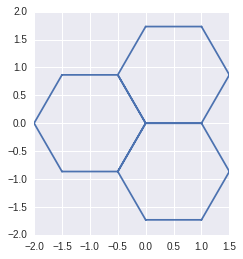

In [3]:
fig, ax = quick_edge_draw(sheet)

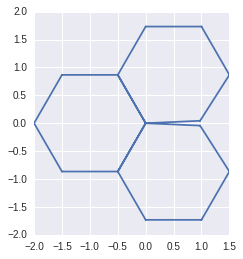

In [4]:
split_vert(sheet, 1, epsilon=5e-2)
geom.update_all(sheet)
fig, ax = quick_edge_draw(sheet)

18


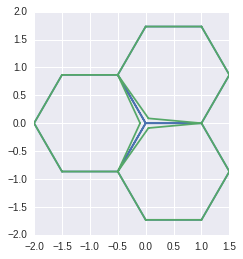

In [5]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)
geom.update_all(sheet)
print(sheet.Ne)
fig, ax = quick_edge_draw(sheet)

split_vert(sheet, 0, epsilon=1e-1)

geom.update_all(sheet)

fig, ax = quick_edge_draw(sheet, ax=ax)


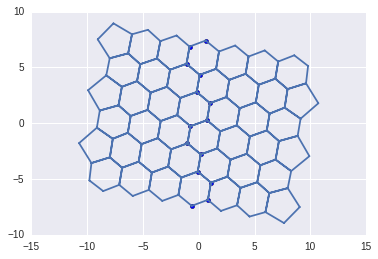

In [28]:
from tyssue.dynamics import SheetModel
from tyssue.solvers.sheet_vertex_solver import Solver 
from tyssue.dynamics.sheet_isotropic_model import isotropic_relax

sheet = Sheet.planar_sheet_3d('8x8', 8, 8,
                              distx=1, disty=1)
sheet.sanitize()
for c in sheet.coords:
    sheet.vert_df[c] -= sheet.vert_df[c].mean()
geom.update_all(sheet)

dyn_specs = config.dynamics.quasistatic_sheet_spec()
ddyn_specs = SheetModel.dimentionalize(dyn_specs)
sheet.update_specs(ddyn_specs)
isotropic_relax(sheet, dyn_specs, geom)

res = Solver.find_energy_min(sheet, geom, SheetModel)

fault_verts = sheet.vert_df[(sheet.vert_df['x'] < 1.5) &
                            (sheet.vert_df['x'] > -1.2)].copy()
fault_verts.sort_values('y', inplace=True)
fig, ax = quick_edge_draw(sheet)
ax.scatter(fault_verts['x'],
           fault_verts['y'])


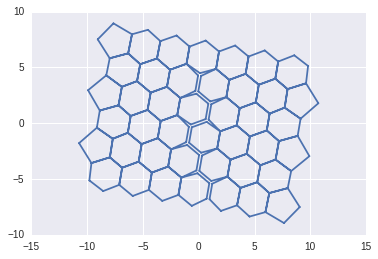

In [29]:
for vert in fault_verts.index[1:-3]:
    split_vert(sheet, vert, epsilon=1e-1)
fig, ax = quick_edge_draw(sheet, lw=0.6, alpha=1)


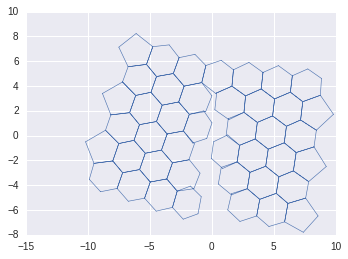

In [33]:
res = Solver.find_energy_min(sheet, geom, SheetModel)
fig, ax = quick_edge_draw(sheet, lw=0.6, alpha=1)
